# Chest X-Ray Images (Pneumonia)
[link datashet](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/code/data)


In [ ]:
# 1️⃣ Setup & Import
# =========================================
!pip install kagglehub
import kagglehub
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# 2️⃣ Download Dataset dari Kaggle
# =========================================
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("✅ Dataset downloaded to:", path)
# Struktur: /content/chest_xray/train /val /test


Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
✅ Dataset downloaded to: /kaggle/input/chest-xray-pneumonia


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
# 4️⃣ Bangun Model CNN (mirip model tumor lo)
# =========================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3️⃣ Data Preprocessing & Augmentation
# =========================================
base_dir = path # Use the path variable from previous cells

train_dir = os.path.join(base_dir, 'chest_xray', 'train')
val_dir = os.path.join(base_dir, 'chest_xray', 'val')
test_dir = os.path.join(base_dir, 'chest_xray', 'test')

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation and test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Train the model

### Subtask:
Train the CNN model using the data generators created in the previous step.


**Reasoning**:
The previous code block failed because `train_data` and `val_data` were not defined. These should be `train_generator` and `validation_generator` which were created in the previous successful subtask. This code block will correct the variable names and train the model using the defined generators and epochs.



In [ ]:
#5️⃣ Training
# =========================================
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.7339 - loss: 0.7001 - val_accuracy: 0.8125 - val_loss: 0.4353
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 609s 4s/step - accuracy: 0.8911 - loss: 0.2686 - val_accuracy: 0.8125 - val_loss: 0.7386
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 618s 4s/step - accuracy: 0.9220 - loss: 0.1893 - val_accuracy: 0.8750 - val_loss: 0.3860
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 619s 4s/step - accuracy: 0.9230 - loss: 0.1911 - val_accuracy: 0.6250 - val_loss: 1.0971
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 601s 4s/step - accuracy: 0.9266 - loss: 0.1841 - val_accuracy: 0.6875 - val_loss: 0.8839
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 608s 4s/step - accuracy: 0.9374 - loss: 0.1631 - val_accuracy: 0.6875 - val_loss: 0.8327
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.9343 - loss: 0.1636 - val_accuracy: 0.6250 - val_loss: 0.9680
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 613s 4s/step - accuracy: 0.9469 - loss: 0.1441 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8171 - loss: 0.5937

✅ Test Accuracy: 0.8413


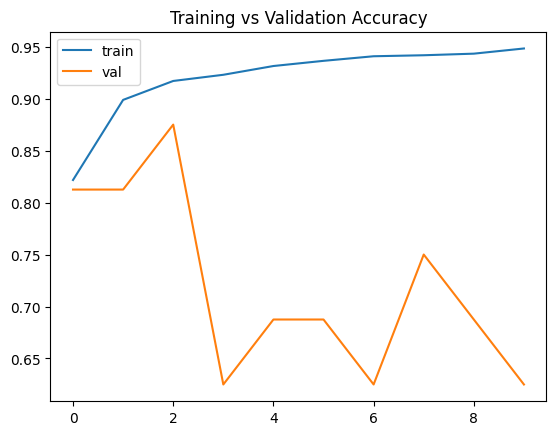

In [ ]:
# 6️⃣ Evaluasi
# =========================================
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
# 7️⃣ Simpan Model
# =========================================
model.save('/content/pneumonia_cnn.h5')
print("✅ Model saved!")

✅ Model saved!


In [ ]:
# ✅ Versi aman: selalu ubah ke RGB, resize, dan scale 0..1
from PIL import Image
import numpy as np

IMG_SIZE = (224, 224)

def preprocess_path(path, to_rgb=True):
    img = Image.open(path)
    if to_rgb:
        img = img.convert("RGB")          # pastikan 3 channel
    else:
        # kalau kamu sengaja mau grayscale, stack jadi 3 channel
        img = img.convert("L")            # 1 channel
        img = Image.merge("RGB", (img, img, img))  # -> 3 channel
    img = img.resize(IMG_SIZE)
    x = np.array(img).astype("float32") / 255.0    # scale sama seperti generator
    x = np.expand_dims(x, axis=0)                  # (1, 224, 224, 3)
    return img, x


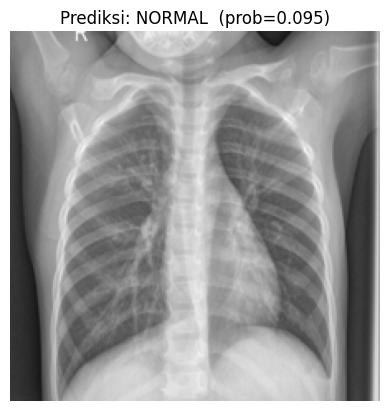

In [ ]:
# catatan: di kode kamu variabelnya 'test_generator' — di atas kamu pakai 'test_data'.
# pakai yang sesuai dengan cell generator kamu.
sample_path = test_generator.filepaths[5]   # atau test_generator.filepaths[5]

img, x = preprocess_path(sample_path, to_rgb=True)

pred = model.predict(x, verbose=0)[0][0]
label = 'PNEUMONIA' if pred > 0.5 else 'NORMAL'

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"Prediksi: {label}  (prob={pred:.3f})")
plt.axis('off')
plt.show()

In [ ]:
import random
for i in random.sample(range(len(test_generator.filepaths)), 5):
    path = test_generator.filepaths[i]
    img, x = preprocess_path(path)
    p = model.predict(x, verbose=0)[0][0]
    print(f"{os.path.basename(path)} → {'PNEUMONIA' if p>0.5 else 'NORMAL'} ({p:.3f})")

person78_bacteria_378.jpeg → PNEUMONIA (0.999)
NORMAL2-IM-0030-0001.jpeg → PNEUMONIA (0.683)
person72_virus_133.jpeg → PNEUMONIA (0.940)
IM-0070-0001.jpeg → NORMAL (0.029)
person158_bacteria_744.jpeg → PNEUMONIA (1.000)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int)
print(classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step
              precision    recall  f1-score   support

      NORMAL       0.40      0.24      0.30       234
   PNEUMONIA       0.63      0.78      0.70       390

    accuracy                           0.58       624
   macro avg       0.52      0.51      0.50       624
weighted avg       0.54      0.58      0.55       624



In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

model.fit(train_generator, validation_data=validation_generator, epochs=10, class_weight=class_weights)

{0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 956s 6s/step - accuracy: 0.5491 - loss: 0.7451 - val_accuracy: 0.6875 - val_loss: 0.6502
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 926s 6s/step - accuracy: 0.6516 - loss: 0.6397 - val_accuracy: 0.6250 - val_loss: 0.6328
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 933s 6s/step - accuracy: 0.6786 - loss: 0.5989 - val_accuracy: 0.6875 - val_loss: 0.5832
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 933s 6s/step - accuracy: 0.7254 - loss: 0.5696 - val_accuracy: 0.6875 - val_loss: 0.5657
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 915s 6s/step - accuracy: 0.7507 - loss: 0.5325 - val_accuracy: 0.6875 - val_loss: 0.5547
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 913s 6s/step - accuracy: 0.7594 - loss: 0.5143 - val_accuracy: 0.6250 - val_loss: 0.6019
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 912s 6s/step - accuracy: 0.7615 - loss: 0.4976 - val_accuracy: 0.6250 - val_loss: 0.6646
Epoch 8/10
163/163 ━━━━━━━

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int)
print(classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step
              precision    recall  f1-score   support

      NORMAL       0.37      0.55      0.44       234
   PNEUMONIA       0.61      0.43      0.51       390

    accuracy                           0.47       624
   macro avg       0.49      0.49      0.47       624
weighted avg       0.52      0.47      0.48       624



In [ ]:
# 7️⃣ Simpan Model
# =========================================
model.save('/content/pneumonia_c2nn.h5')
print("✅ Model saved!")

✅ Model saved!
